In [1]:
from PYME.IO.image import ImageStack
from detector import Detector
import matplotlib.pyplot as plt
# %matplotlib widget
# plt.set_loglevel("warning")
import numpy as np

In [2]:
im = ImageStack(filename=r"C:\Users\aesb\Downloads\calib 50 50nm steps ten acquisition each step gain 300_3.tif", haveGUI=False)


filename == C:\Users\aesb\Downloads\calib 50 50nm steps ten acquisition each step gain 300_3.tif
C:\Users\aesb\Downloads\calib 50 50nm steps ten acquisition each step gain 300_3.tif
(500, 256, 256)
[256, 256, 500, 1, 1]


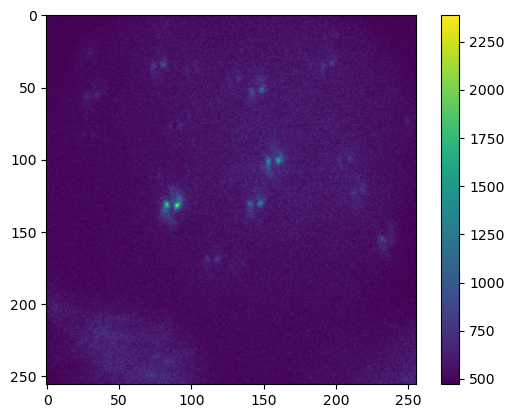

In [64]:
plt.imshow(im.data_xytc[:,:,0,0])
plt.colorbar()

In [44]:
detector = Detector(im.data_xytc.shape[:2], 15, mag=0.15)

In [45]:
strength_image, angle_image = detector.filter_frame(np.asarray(im.data_xytc[:,:,0,0].squeeze(), dtype=float))

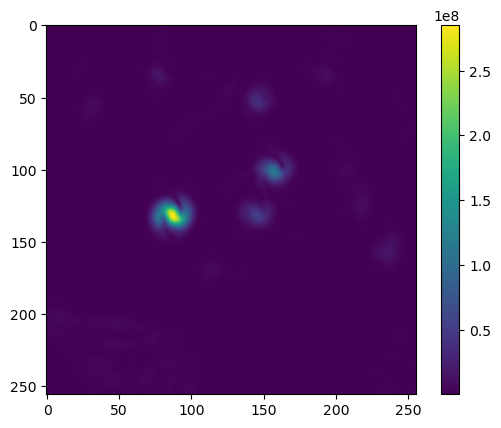

In [46]:
plt.figure()
plt.imshow(strength_image)
plt.colorbar()

In [59]:
row, col, orientation = detector.extract_candidates(strength_image, angle_image, 0.05E8)

In [60]:
row

array([ 34,  35,  54,  56, 102, 124, 132, 132, 158, 169, 203, 207, 237,
       245], dtype=int64)

In [61]:
col
orientation

array([-0.50662547, -0.58712056, -0.66835308, -0.57240922, -0.54036985,
       -1.14140108, -0.43913315, -0.6194396 , -1.2250603 , -0.49868   ,
        0.50462826, -0.00391414,  1.24229163, -0.18572645])

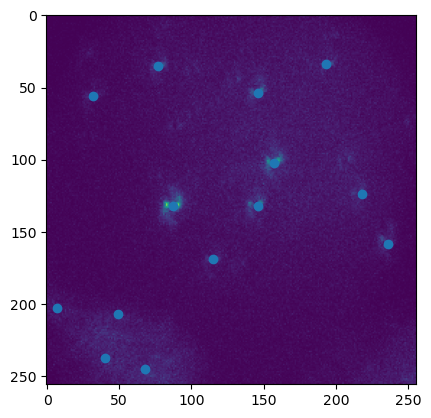

In [62]:
plt.figure()
plt.imshow(im.data_xytc[:,:,0,0])
plt.scatter(col, row)
plt.show()

Text(0.5, 1.0, 'Orientation Map [radians]')

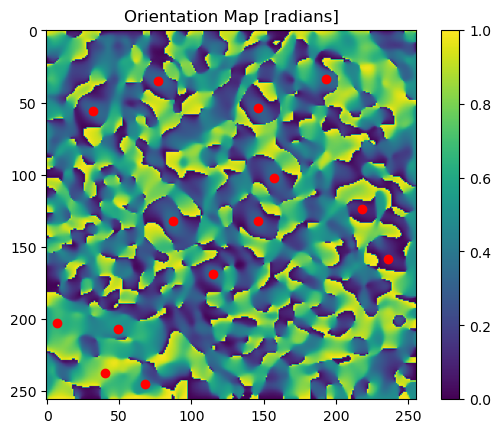

In [65]:
plt.figure()
plt.imshow(angle_image)
plt.scatter(col, row, c='r')
plt.colorbar()
plt.title('Orientation Map [radians]')